Topics :
- Bayesian Probabilities
- Bayes Nets and algorithms that underpin them
- Practical considerations in running Bayes nets on the given data

In [9]:
from IPython.display import Image

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

C:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
df = pd.read_csv("data_2_cat.csv")

In [12]:
df = df.drop(df.columns[0], axis=1)

In [13]:
df['tier'] = df['tier'].replace(['First','Second'],['1','2'])
df['tier'] = df['tier'].astype(float)

In [14]:
df = df.drop('Country',axis=1)

In [15]:
df = df.drop('Happiness Rank',axis=1)

In [16]:
df = df.drop('Happiness Score',axis=1)

In [17]:
df.head()

,Year,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


# Documentation on Bayes nets

https://scikit-learn.org/stable/modules/naive_bayes.html#

- Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem

In [13]:
Image(url="2.PNG", width=200, height=300)

P(cause\effect) = P(effect\cause)P(cause)/P(effect)
- knowing P (effect |cause) is a matter of routine observation
- finding out P (cause|effect ) – amounts to learning, acquiring new knowledge about the world!

In [15]:
Image(url="3.PNG", width=400, height=300)

and we can use Maximum A Posteriori (MAP) estimation to estimate P(y) and P(xi \y) ; the former is then the **relative frequency of class y in the training set**.

- The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution P(xi \y)
- Naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering.
- Naive Bayes classifiers require a small amount of training data to estimate the necessary parameters. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.
- Although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.

## Gaussian Naive Bayes

The likelihood of the features is assumed to be Gaussian:

In [21]:
Image(url="5.PNG", width=400, height=300)

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


## Multinomial Naive Bayes

It implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors (product of two statistics, term frequency and inverse document frequency, formula that aims to define the importance of a keyword or phrase within a document or a web page) are also known to work well in practice).

- The distribution is parametrized by vectors θy = (θy1,...,θyn) for each class y, where n is the number of features (in text classification, the size of vocabulary) and θyi is the probability P(xi \y) of feature i appearing in sample belonging to class y.

In [27]:
Image(url="6.PNG", width=600, height=400)

- The smoothing priors **α >= 0** accounts for features not present in the learning samples and prevents zero probabilities in further computations.
- Setting **α = 1** is called **Laplace smoothing**
- **α < 1** is called **Lidstone smoothing**.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = MultinomialNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 30


## Complement Naive Bayes

- It implements the complement naive Bayes (CNB) algorithm.
- CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets.
- CNB uses statistics from the complement of each class to compute the model’s weights.
- The parameter estimates for CNB are more stable than those for MNB
- CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks.
- A document is assigned to the class that is the poorest complement match.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = ComplementNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 30


## Bernoulli Naive Bayes

- Implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. 
- This class requires samples to be represented as binary-valued feature vectors, if handed any other kind of data a BernoulliNB instance may binarize its input (depending on the binarize parameter)

The decision rule for Bernoulli naive Bayes is based on :

In [33]:
Image(url="7.PNG", width=400, height=400)

- This differs from multinomial NB’s rule in that it explicitly penalizes the non-occurrence of a feature i that is an indicator for class y, where the multinomial variant would simply ignore a non-occurring feature.
- In the case of text classification, word occurrence vectors (rather than word count vectors) may be used to train and use this classifier. BernoulliNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [64]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 54


Note : the data is not binary might affect results

## Categorical Naive Bayes

- Implements the categorical naive Bayes algorithm for categorically distributed data.
- It assumes that each feature, which is described by the index i, has its own categorical distribution.
- For each feature i in the training set X, CategoricalNB estimates a categorical distribution for each feature i of X conditioned on the class y.
- The index set of the samples is defined as J = {1,...,m}, with m as the number of samples.

In [35]:
Image(url="8.PNG", width=600, height=400)

CategoricalNB assumes that the sample matrix X is encoded (for instance with the help of **OrdinalEncoder**) such that all categories for each feature i are represented with numbers 0,...,ni-1 where ni is the number of available categories of feature i.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = CategoricalNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 7


## Out-of-core Naive Bayes model fitting 

Naive Bayes models can be used to tackle large scale classification problems for which the full training set might not fit in memory.
- To handle this, MultinomialNB, BernoulliNB, and GaussianNB expose a **partial_fit** method that can be used incrementally as done with other classifiers
- All naive Bayes classifiers support sample weighting.
- Contrary to the fit method, the first call to partial_fit needs to be passed the list of all the expected class labels.
-  out-of-core learning documentation : https://scikit-learn.org/stable/computing/scaling_strategies.html#scaling-strategies
- The partial_fit method call of naive Bayes models introduces some computational overhead (any combination of excess or indirect computation time, memory, bandwidth...). It is recommended to use data chunk sizes that are as large as possible, that is as the available RAM allows.

Out-of-core classification of text documents : https://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html#sphx-glr-auto-examples-applications-plot-out-of-core-classification-py 

# DM and ML portfolio

Repeat the evaluation steps from the last lab, replacing the classifier you used with the Bayes net. Check: does it have better performance in any of the evaluation metrics?

In [18]:
from sklearn.model_selection import train_test_split
# Creating independent and dependent variables
X = df.drop('tier',axis=1)
y = df['tier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 7), (744,)
Train Data: (187, 7), (187,)


## Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
predictions = GNB.fit(X_train, y_train).predict(X_test)

### Accuracy

In [43]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.8502673796791443


### Confusion matrix

[[65 11]
 [17 94]]


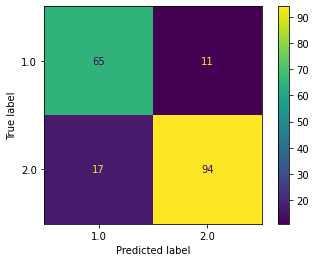

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(GNB, X_test, y_test)
plt.show()

In [69]:
CM = confusion_matrix(y_test, predictions)
total =sum(sum(CM))

In [70]:
FP = CM.sum(axis=0)- np.diag(CM)
FN = CM.sum(axis=1)-np.diag(CM)

TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

### Sensitivity

In [75]:
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.9473684210526315


In [72]:
TPR = TP/(TP + FN)
print("Sensitivity: ", TPR )

Sensitivity:  [0.94736842 0.69369369]


### Specificity

In [76]:
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)

Specificity :  0.6936936936936937


In [74]:
PPV = TN/(TN + FP)
print("Sensitivity: ", PPV )

Sensitivity:  [0.69369369 0.94736842]


### Precision

In [48]:
from sklearn.metrics import precision_score
#fixed error : https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary 
# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions,average='micro')}")

Precision Score of the classifier is: 0.8502673796791443


In [49]:
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.7926829268292683


### Recall

In [50]:
from sklearn.metrics import recall_score
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions, average='micro')}")

Recall Score of the classifier is: 0.8502673796791443


In [51]:
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.8552631578947368


### F1-score

In [52]:
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions, average='micro' )}")

F1 Score of the classifier is: 0.8502673796791445


In [53]:
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions )}")

F1 Score of the classifier is: 0.8227848101265822


### Classification report

In [55]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
report = classification_report(y_test, predictions, target_names=target_names)

In [56]:
print(report)

              precision    recall  f1-score   support

     class 0       0.79      0.86      0.82        76
     class 1       0.90      0.85      0.87       111

    accuracy                           0.85       187
   macro avg       0.84      0.85      0.85       187
weighted avg       0.85      0.85      0.85       187



### Area under ROC curve

In [85]:
# Importing all necessary libraries
#from sklearn.metrics import roc_curve, auc

#class_probabilities = GNB.predict_proba(X_test)
#preds = class_probabilities[:, 1]

#added pos_label=1 because before i had the error ValueError: multiclass format is not supported
#https://stackoverflow.com/questions/61114520/how-to-fix-valueerror-multiclass-format-is-not-supported 
#fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=1)
#roc_auc = auc(fpr, tpr)

# Printing AUC
#print(f"AUC for our classifier is: {roc_auc}")

In [84]:
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
y_preb_probs = GNB.predict_proba(X_test)
y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test, y_preb_probs)
print('AUC: %.2f' % auc)

AUC: 0.95


## Multinomial Naive Bayes

In [137]:
from sklearn.naive_bayes import  MultinomialNB
MNB =  MultinomialNB()
predictions = MNB.fit(X_train, y_train).predict(X_test)

### Accuracy

In [87]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.7967914438502673


### Confusion matrix

[[72  4]
 [34 77]]


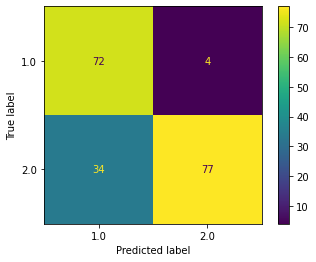

In [88]:
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(MNB, X_test, y_test)
plt.show()

### Sensitivity

In [109]:
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.9473684210526315


### Specificity

In [110]:
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)

Specificity :  0.6936936936936937


### Precision

In [111]:
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.6792452830188679


### Recall

In [112]:
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.9473684210526315


### F1-score

In [113]:
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions )}")

F1 Score of the classifier is: 0.7912087912087911


### Classification report

In [114]:
target_names = ['class 0', 'class 1']
report = classification_report(y_test, predictions, target_names=target_names)

In [115]:
print(report)

              precision    recall  f1-score   support

     class 0       0.68      0.95      0.79        76
     class 1       0.95      0.69      0.80       111

    accuracy                           0.80       187
   macro avg       0.81      0.82      0.80       187
weighted avg       0.84      0.80      0.80       187



### AUC

In [138]:
y_preb_probs = MNB.predict_proba(X_test)
y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test, y_preb_probs)
print('AUC: %.2f' % auc)

AUC: 0.95


## Complement Naive Bayes

In [139]:
from sklearn.naive_bayes import  ComplementNB
CNB =  ComplementNB()
predictions = CNB.fit(X_train, y_train).predict(X_test)

### Accuracy

In [118]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.8556149732620321


### Confusion matrix

[[69  7]
 [20 91]]


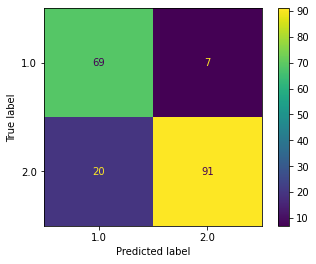

In [119]:
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(CNB, X_test, y_test)
plt.show()

In [120]:
CM = confusion_matrix(y_test, predictions)

### Sensitivity

In [121]:
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.9078947368421053


### Specificity

In [122]:
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)

Specificity :  0.8198198198198198


### Precision

In [123]:
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.7752808988764045


### Recall

In [124]:
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.9078947368421053


### AUC

In [140]:
y_preb_probs = CNB.predict_proba(X_test)
y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test, y_preb_probs)
print('AUC: %.2f' % auc)

AUC: 0.95


## Bernoulli Naive Bayes

In [141]:
from sklearn.naive_bayes import  BernoulliNB
BNB =  BernoulliNB()
predictions = BNB.fit(X_train, y_train).predict(X_test)

In [127]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.43315508021390375


[[ 76   0]
 [106   5]]


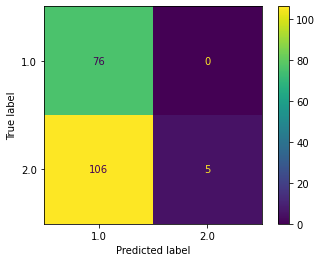

In [129]:
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(BNB, X_test, y_test)
plt.show()

In [130]:
CM = confusion_matrix(y_test, predictions)

In [131]:
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  1.0


In [132]:
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)

Specificity :  0.04504504504504504


In [135]:
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.4175824175824176


In [136]:
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 1.0


In [142]:
y_preb_probs = BNB.predict_proba(X_test)
y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test, y_preb_probs)
print('AUC: %.2f' % auc)

AUC: 0.52


## Categorical Naive Bayes

In [145]:
from sklearn.naive_bayes import  CategoricalNB
CANB =  CategoricalNB()
predictions = CANB.fit(X_train, y_train).predict(X_test)

In [146]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.8235294117647058


[[62 14]
 [19 92]]


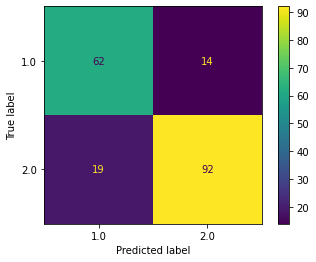

In [147]:
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(CANB, X_test, y_test)
plt.show()

In [148]:
CM = confusion_matrix(y_test, predictions)

In [149]:
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.8157894736842105


In [150]:
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)

Specificity :  0.8288288288288288


In [151]:
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.7654320987654321


In [152]:
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.8157894736842105


In [153]:
y_preb_probs = CANB.predict_proba(X_test)
y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test, y_preb_probs)
print('AUC: %.2f' % auc)

AUC: 0.86


##  Complex Bayes Nets (i.e. Bayes nets with complex hierarchical structure) (optional)

- Investigate whether any of these libraries can work with your data sets, and whether this brings any improvement. 
- Note: complex Bayes nets can show non-trivial dependencies among features. So, they may have better explanatory power.

**PyMC3** and **PySTAN** are two of the leading frameworks for Bayesian inference in Python: offering concise model specification, MCMC sampling, and a growing amount of built-in conveniences for model validation, verification and prediction. **Arviz** which is a suite of vizualization tools which supports both PyMC3 and PyStan.

https://www.modelop.com/blog/an-introduction-to-bayesian-modeling-in-pystan/

In [157]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.Collecting pystan



In [159]:
pip install arviz

In [160]:
import pystan as stan
from sklearn.utils import resample
from scipy.stats import bernoulli
import scipy
import itertools
import arviz as az

There are several blocks of most Stan model: 
- the data block where the input data is defined, 
- the parameters block where model parameters are introduced, 
- the model block where the model is specified, 
- the generated quantities block where samples which are dependent on the posterior distribution can be generated. 

There are a number of other blocks which are often used in Stan but not present in this model: transformed data and transformed parameters are quite common as well.

https://twiecki.io/blog/2018/08/13/hierarchical_bayesian_neural_network/

https://towardsdatascience.com/hands-on-bayesian-statistics-with-python-pymc3-arviz-499db9a59501

In [164]:
pip install pymc3

  Using cached pymc3-3.11.5-py3-none-any.whl (872 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached Theano_PyMC-1.1.2-py3-none-any.whl
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
  Using cached deprecat-2.1.1-py2.py3-none-any.whl (9.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [166]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pymc3 as pm
from pymc3 import floatX
import theano
import theano.tensor as tt

In [167]:
from theano import shared
from sklearn import preprocessing

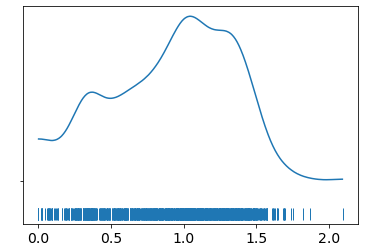

In [168]:
az.plot_kde(df['GDP per Capita'].values, rug=True)
plt.yticks([0], alpha=0);

In [4]:
df2 = pd.read_csv("data_2_cat.csv")

In [5]:
df2 = df2.drop(df2.columns[0], axis=1)

In [6]:
df2['tier'] = df2['tier'].replace(['First','Second'],['1','2'])
df2['tier'] = df2['tier'].astype(float)

In [7]:
df2 = df2.drop('Country',axis=1)

In [8]:
df2 = df2.drop('Happiness Rank',axis=1)

In [9]:
df2 = df2.drop('Happiness Score',axis=1)

In [176]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


https://medium.com/edureka/bayesian-networks-2499f133d2ec#:~:text=Bayesian%20Networks%20In%20Python%20Bayesian%20Networks%20have%20given,era%20such%20as%20Artificial%20Intelligence%20and%20Machine%20Learning.

In [178]:
pip install pomegranate

Note: you may need to restart the kernel to use updated packages.


In [192]:
import math
import pomegranate

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# Conclusions :

- discuss which Bayes net implementations and which evaluation metrics worked best. If some worked better, can you hypothesise why?
- fill table "Algorithm versus metrics performance":

In [37]:
Image(url="9.PNG", width=600, height=400)

- In the table, highlight with bold the best performing algorithms in each category. Make conclusions

### Distribution of the class "tier"

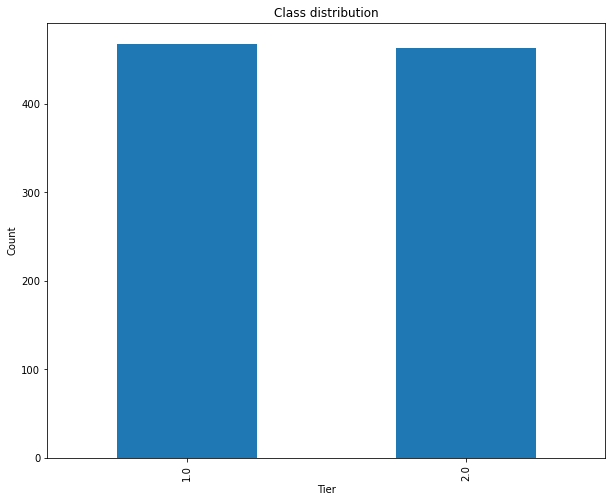

In [10]:
count = df2['tier'].value_counts()
count.plot(kind='bar',figsize=(10,8))
plt.title("Class distribution")
# Setting the X and Y labels
plt.xlabel('Tier')
plt.ylabel('Count') 
# Adding the legends
plt.show()

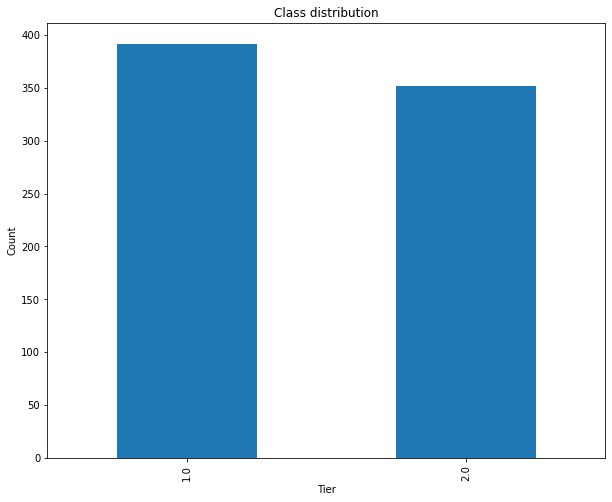

In [20]:
count = y_train.value_counts()
count.plot(kind='bar',figsize=(10,8))
plt.title("Class distribution")
# Setting the X and Y labels
plt.xlabel('Tier')
plt.ylabel('Count') 
# Adding the legends
plt.show()

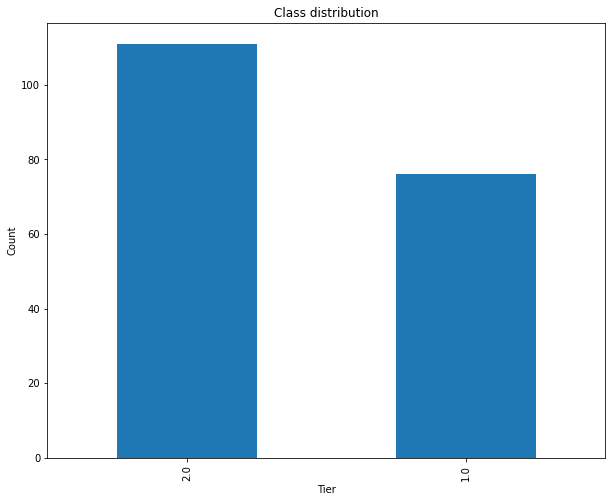

In [21]:
count = y_test.value_counts()
count.plot(kind='bar',figsize=(10,8))
plt.title("Class distribution")
# Setting the X and Y labels
plt.xlabel('Tier')
plt.ylabel('Count') 
# Adding the legends
plt.show()